# Classification Analysis 
## Implementation of Support Vector Machines (SVM) for classifying images of hand written digits into their respective numerical classes (0 to 9). 

# CL II : Assignment No. 3
## Name : Parkale Shreya
## Roll No.: 2447060
## Batch : C

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = datasets.mnist.load_data()
print(X_train_full.shape,y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


2


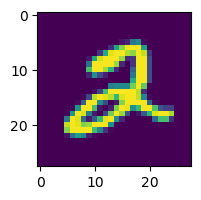

In [3]:
plt.figure(figsize=(4,2))
plt.imshow(X_train_full[5])
print(y_train_full[5])

In [4]:
X_train_full = X_train_full.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [5]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0

X_train_full

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Train data shape after flattening: {X_train.shape}")

Train data shape after flattening: (48000, 784)


In [8]:
# Train an SVM classifier
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model.fit(X_train, y_train)

SVC()

In [9]:
# Predict on the validation set
y_val_pred = svm_model.predict(X_val)

In [10]:
# Evaluate performance
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

print(confusion_matrix(y_val, y_val_pred))
# print(classification_report(y_val, y_val_pred))

Validation Accuracy: 96.35%
[[1152    0    3    0    2    5   10    1    2    0]
 [   0 1298   11    4    1    0    2    3    1    2]
 [   1    7 1128    9    6    0    5   11    5    2]
 [   0    2   22 1155    1    9    1   16    9    4]
 [   1    1    6    0 1141    1    2    6    1   17]
 [   5    2    3   19    3 1053    8    7    4    0]
 [   4    1    4    0    3    4 1145   12    4    0]
 [   2    7   11    3    7    0    0 1255    3   11]
 [   2    5    9    9    6   11    2    9 1103    4]
 [   3    2    4    4   13    4    0   29    3 1132]]


In [11]:
# Predict on the test set
y_test_pred = svm_model.predict(X_test)

# Evaluate test performance
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 96.34%


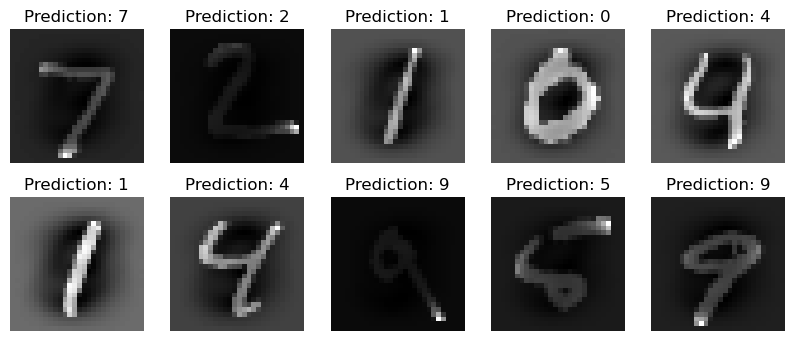

In [12]:
# Now visualize the predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Prediction: {y_test_pred[i]}')
    plt.axis('off')
plt.show()